In [1]:
%matplotlib inline

In [2]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.max_columns', 50) # print all rows


import os
os.chdir('/Users/evanbiederstedt/Downloads/RRBS_data_files')

import statsmodels.api as sm

In [3]:
"""
total_normal_pairs_RRBS_NormalBCD19pcell45_66.csv
total_normal_pairs_RRBS_NormalBCD19pcell67_88.csv
total_normal_pairs_RRBS_NormalBCD19pcell23_44.csv
total_normal_pairs_RRBS_NormalBCD19pcell1_22.csv
total_normal_pairs_NormalBCD19pCD27mcell45_66.csv
total_normal_pairs_NormalBCD19pCD27mcell23_44.csv
total_normal_pairs_NormalBCD19pCD27mcell1_22.csv
total_normal_pairs_Normal_B_cell_A1_24.csv
total_normal_pairs_NormalBCD19pCD27mcell67_88.csv
total_normal_pairs_Normal_B_cell_H1_22.csv
total_normal_pairs_Normal_B_cell_G1_22.csv
total_normal_pairs_Normal_B_cell_D1_24.csv
total_normal_pairs_Normal_B_cell_C1_24.csv
total_normal_pairs_Normal_B_cell_B1_24.csv
total_CLL_pairs.csv
total_normal_pairs.csv
total_CLL_pairs_cw154_CutSmart_proteinase_K.csv
total_CLL_pairs_cw154_Tris_protease_GR.csv
total_CLL_pairs_cw154_Tris_protease.csv
total_CLL_pairs_trito_pool_2.csv
total_CLL_pairs_trito_pool_1.csv



"""





'\ntotal_normal_pairs_RRBS_NormalBCD19pcell45_66.csv\ntotal_normal_pairs_RRBS_NormalBCD19pcell67_88.csv\ntotal_normal_pairs_RRBS_NormalBCD19pcell23_44.csv\ntotal_normal_pairs_RRBS_NormalBCD19pcell1_22.csv\ntotal_normal_pairs_NormalBCD19pCD27mcell45_66.csv\ntotal_normal_pairs_NormalBCD19pCD27mcell23_44.csv\ntotal_normal_pairs_NormalBCD19pCD27mcell1_22.csv\ntotal_normal_pairs_Normal_B_cell_A1_24.csv\ntotal_normal_pairs_NormalBCD19pCD27mcell67_88.csv\ntotal_normal_pairs_Normal_B_cell_H1_22.csv\ntotal_normal_pairs_Normal_B_cell_G1_22.csv\ntotal_normal_pairs_Normal_B_cell_D1_24.csv\ntotal_normal_pairs_Normal_B_cell_C1_24.csv\ntotal_normal_pairs_Normal_B_cell_B1_24.csv\ntotal_CLL_pairs.csv\ntotal_normal_pairs.csv\ntotal_CLL_pairs_cw154_CutSmart_proteinase_K.csv\ntotal_CLL_pairs_cw154_Tris_protease_GR.csv\ntotal_CLL_pairs_cw154_Tris_protease.csv\ntotal_CLL_pairs_trito_pool_2.csv\ntotal_CLL_pairs_trito_pool_1.csv\n\n\n\n'

In [4]:
cll_pairs = pd.read_csv("total_CLL_pairs.csv")
normal_pairs = pd.read_csv("total_normal_pairs.csv")

In [5]:
cll_pairs.shape

(5356, 43)

In [6]:
normal_pairs.shape

(58311, 43)

In [7]:
cll_pairs.columns

Index(['filename', 'methylation_difference', 'PDR_difference',
       'methylation_unweighted_difference', 'PDR_unweighted_difference',
       'methylation_tssDistance_difference',
       'methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfUpDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference',

In [8]:
cll_pairs.head()

,filename,methylation_difference,PDR_difference,methylation_unweighted_difference,PDR_unweighted_difference,methylation_tssDistance_difference,methylation_genesDistance_difference,methylation_exonsDistance_difference,methylation_intronsDistance_difference,methylation_promoterDistance_difference,methylation_cgiDistance_difference,methylation_ctcfDistance_difference,methylation_ctcfUpDistance_difference,methylation_ctcfDownDistance_difference,methylation_geneDistalRegulatoryModulesDistance,methylation_vistaEnhancersDistance_difference,methylation_3PrimeUTRDistance_difference,methylation_5PrimeUTRDistance_difference,methylation_firstExonDistance_difference,methylation_geneDistalRegulatoryModulesK562Distance_difference,methylation_hypoInHues64Distance_difference,methylation_intergenic_difference,methylation_shore_difference,methylation_shelf_difference,PDR_tssDistance_difference,PDR_genesDistance_difference,PDR_exonsDistance_difference,PDR_intronsDistance_difference,PDR_promoterDistance_difference,PDR_cgiDistance_difference,PDR_ctcfDistance_difference,PDR_ctcfUpDistance_difference,PDR_ctcfDownDistance_difference,PDR_geneDistalRegulatoryModulesDistance,PDR_vistaEnhancersDistance_difference,PDR_3PrimeUTRDistance_difference,PDR_5PrimeUTRDistance_difference,PDR_firstExonDistance_difference,PDR_geneDistalRegulatoryModulesK562Distance_difference,PDR_hypoInHues64Distance_difference,PDR_intergenic_difference,PDR_shore_difference,PDR_shelf_difference
0,('RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.AC...,0.057204,0.022449,0.034221,0.009275,0.0,0.061908,0.063171,0.061692,0.008419,0.015893,0.021971,0.0,0.021971,0.313298,0.168000,0.072074,0.039032,0.005708,0.009695,0.115001,0.023945,0.060024,0.026049,0.0,0.017944,0.014914,0.023745,0.010619,0.007573,0.005478,0.0,0.005478,0.443367,0.447138,0.033053,0.010550,0.007207,0.006339,0.050882,0.038740,0.025786,0.017234
1,('RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.AC...,0.037458,0.017916,0.020480,0.011559,0.0,0.037036,0.030429,0.039083,0.010795,0.011695,0.004564,0.0,0.004564,0.322613,0.071913,0.003508,0.025250,0.004269,0.020952,0.044339,0.027542,0.038797,0.021242,0.0,0.013822,0.009663,0.015477,0.002511,0.004552,0.016568,0.0,0.016568,0.448398,0.068598,0.033664,0.011063,0.001208,0.025634,0.117134,0.031556,0.010400,0.018353
2,('RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.AC...,0.013352,0.005818,0.011913,0.006049,0.0,0.012461,0.010976,0.011688,0.009044,0.005338,0.000635,0.0,0.000635,0.335660,0.073183,0.005837,0.009638,0.012017,0.001243,0.061656,0.010744,0.018724,0.005473,0.0,0.006976,0.004017,0.005133,0.013137,0.004066,0.001556,0.0,0.001556,0.449179,0.083869,0.032390,0.006514,0.011039,0.011944,0.225987,0.010122,0.006835,0.000683
3,('RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.AC...,0.000998,0.002018,0.001860,0.004562,0.0,0.003151,0.002555,0.007479,0.000038,0.000232,0.002878,0.0,0.002878,0.334811,0.040023,0.007573,0.009650,0.002276,0.003349,0.089233,0.004504,0.001901,0.000775,0.0,0.004491,0.006306,0.002300,0.000998,0.002985,0.003113,0.0,0.003113,0.437409,0.013400,0.011693,0.000163,0.013259,0.004513,0.122621,0.002354,0.000248,0.001510
4,('RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.AC...,0.029100,0.000121,0.004287,0.008414,0.0,0.030561,0.021995,0.031347,0.012158,0.017333,0.010564,0.0,0.010564,0.315714,0.119406,0.015520,0.029014,0.004847,0.030446,0.052160,0.008754,0.013406,0.024762,0.0,0.002186,0.008113,0.000072,0.004676,0.011485,0.013408,0.0,0.013408,0.437915,0.101218,0.028780,0.000437,0.010612,0.017699,0.074842,0.009969,0.002323,0.005733


In [9]:
cll_pairs.shape

(5356, 43)

In [10]:
cll_pairs.columns

Index(['filename', 'methylation_difference', 'PDR_difference',
       'methylation_unweighted_difference', 'PDR_unweighted_difference',
       'methylation_tssDistance_difference',
       'methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfUpDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference',

In [11]:
meth_cll = cll_pairs[['methylation_unweighted_difference',
       'methylation_tssDistance_difference',
       'methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfUpDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference', 'methylation_shore_difference',
       'methylation_shelf_difference']]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


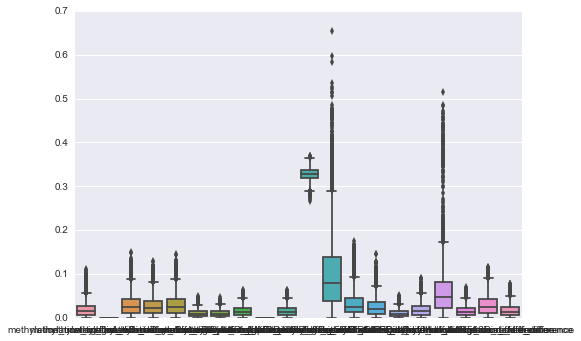

In [12]:
sns.boxplot(meth_cll)

In [13]:
pdr_cll = cll_pairs[['PDR_genesDistance_difference', 'PDR_exonsDistance_difference',
       'PDR_intronsDistance_difference', 'PDR_promoterDistance_difference',
       'PDR_cgiDistance_difference', 'PDR_ctcfDistance_difference', 'PDR_ctcfDownDistance_difference',
       'PDR_geneDistalRegulatoryModulesDistance',
       'PDR_vistaEnhancersDistance_difference',
       'PDR_3PrimeUTRDistance_difference', 'PDR_5PrimeUTRDistance_difference',
       'PDR_firstExonDistance_difference',
       'PDR_geneDistalRegulatoryModulesK562Distance_difference',
       'PDR_hypoInHues64Distance_difference', 'PDR_intergenic_difference',
       'PDR_shore_difference', 'PDR_shelf_difference']]

In [14]:
pdr_normal = normal_pairs[['PDR_genesDistance_difference', 'PDR_exonsDistance_difference',
       'PDR_intronsDistance_difference', 'PDR_promoterDistance_difference',
       'PDR_cgiDistance_difference', 'PDR_ctcfDistance_difference', 'PDR_ctcfDownDistance_difference',
       'PDR_geneDistalRegulatoryModulesDistance',
       'PDR_vistaEnhancersDistance_difference',
       'PDR_3PrimeUTRDistance_difference', 'PDR_5PrimeUTRDistance_difference',
       'PDR_firstExonDistance_difference',
       'PDR_geneDistalRegulatoryModulesK562Distance_difference',
       'PDR_hypoInHues64Distance_difference', 'PDR_intergenic_difference',
       'PDR_shore_difference', 'PDR_shelf_difference']]

In [15]:
pdr_cll.shape

(5356, 17)

In [16]:
pdr_normal.shape

(58311, 17)

In [17]:
pdr_all = pd.concat([pdr_cll, pdr_normal])

In [18]:
pdr_all.shape

(63667, 17)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


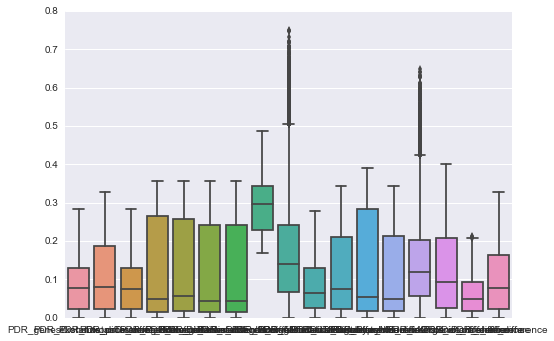

In [19]:
sns.boxplot(pdr_all)

In [20]:
pdr_cll.head()

,PDR_genesDistance_difference,PDR_exonsDistance_difference,PDR_intronsDistance_difference,PDR_promoterDistance_difference,PDR_cgiDistance_difference,PDR_ctcfDistance_difference,PDR_ctcfDownDistance_difference,PDR_geneDistalRegulatoryModulesDistance,PDR_vistaEnhancersDistance_difference,PDR_3PrimeUTRDistance_difference,PDR_5PrimeUTRDistance_difference,PDR_firstExonDistance_difference,PDR_geneDistalRegulatoryModulesK562Distance_difference,PDR_hypoInHues64Distance_difference,PDR_intergenic_difference,PDR_shore_difference,PDR_shelf_difference
0,0.017944,0.014914,0.023745,0.010619,0.007573,0.005478,0.005478,0.443367,0.447138,0.033053,0.010550,0.007207,0.006339,0.050882,0.038740,0.025786,0.017234
1,0.013822,0.009663,0.015477,0.002511,0.004552,0.016568,0.016568,0.448398,0.068598,0.033664,0.011063,0.001208,0.025634,0.117134,0.031556,0.010400,0.018353
2,0.006976,0.004017,0.005133,0.013137,0.004066,0.001556,0.001556,0.449179,0.083869,0.032390,0.006514,0.011039,0.011944,0.225987,0.010122,0.006835,0.000683
3,0.004491,0.006306,0.002300,0.000998,0.002985,0.003113,0.003113,0.437409,0.013400,0.011693,0.000163,0.013259,0.004513,0.122621,0.002354,0.000248,0.001510
4,0.002186,0.008113,0.000072,0.004676,0.011485,0.013408,0.013408,0.437915,0.101218,0.028780,0.000437,0.010612,0.017699,0.074842,0.009969,0.002323,0.005733


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


(-0.01, 0.55)

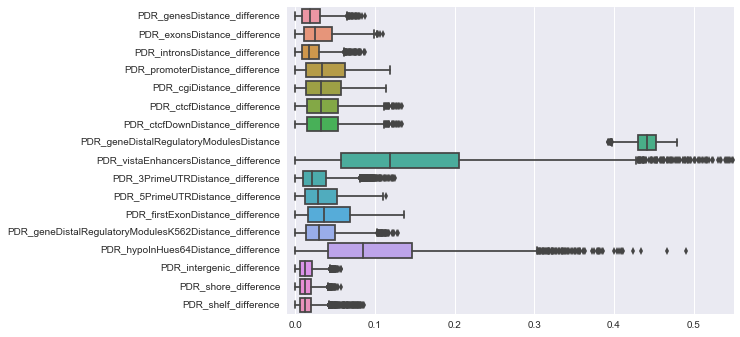

In [21]:
sns.boxplot(pdr_cll, orient="h")
plt.xlim(-0.01, 0.55)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


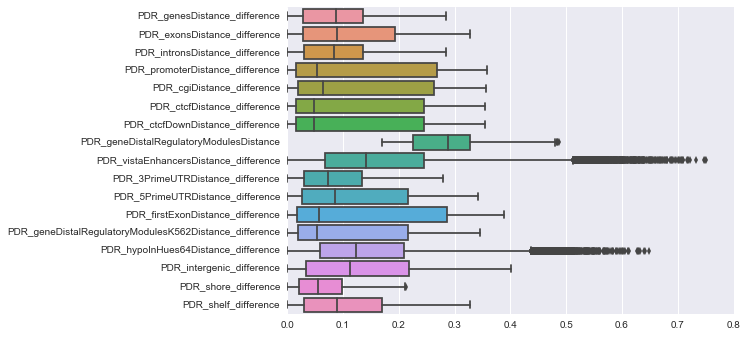

In [22]:
sns.boxplot(pdr_normal, orient="h")


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


(-0.01, 0.55)

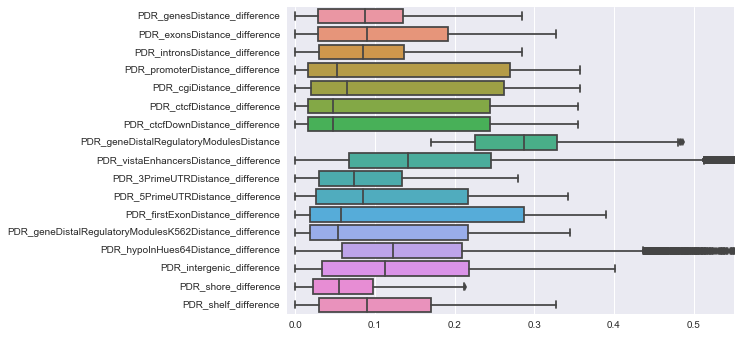

In [23]:
sns.boxplot(pdr_normal, orient="h")
plt.xlim(-0.01, 0.55)

In [24]:
pdr_all.columns

Index(['PDR_genesDistance_difference', 'PDR_exonsDistance_difference',
       'PDR_intronsDistance_difference', 'PDR_promoterDistance_difference',
       'PDR_cgiDistance_difference', 'PDR_ctcfDistance_difference',
       'PDR_ctcfDownDistance_difference',
       'PDR_geneDistalRegulatoryModulesDistance',
       'PDR_vistaEnhancersDistance_difference',
       'PDR_3PrimeUTRDistance_difference', 'PDR_5PrimeUTRDistance_difference',
       'PDR_firstExonDistance_difference',
       'PDR_geneDistalRegulatoryModulesK562Distance_difference',
       'PDR_hypoInHues64Distance_difference', 'PDR_intergenic_difference',
       'PDR_shore_difference', 'PDR_shelf_difference'],
      dtype='object')

In [25]:
pdr_all.head()

,PDR_genesDistance_difference,PDR_exonsDistance_difference,PDR_intronsDistance_difference,PDR_promoterDistance_difference,PDR_cgiDistance_difference,PDR_ctcfDistance_difference,PDR_ctcfDownDistance_difference,PDR_geneDistalRegulatoryModulesDistance,PDR_vistaEnhancersDistance_difference,PDR_3PrimeUTRDistance_difference,PDR_5PrimeUTRDistance_difference,PDR_firstExonDistance_difference,PDR_geneDistalRegulatoryModulesK562Distance_difference,PDR_hypoInHues64Distance_difference,PDR_intergenic_difference,PDR_shore_difference,PDR_shelf_difference
0,0.017944,0.014914,0.023745,0.010619,0.007573,0.005478,0.005478,0.443367,0.447138,0.033053,0.010550,0.007207,0.006339,0.050882,0.038740,0.025786,0.017234
1,0.013822,0.009663,0.015477,0.002511,0.004552,0.016568,0.016568,0.448398,0.068598,0.033664,0.011063,0.001208,0.025634,0.117134,0.031556,0.010400,0.018353
2,0.006976,0.004017,0.005133,0.013137,0.004066,0.001556,0.001556,0.449179,0.083869,0.032390,0.006514,0.011039,0.011944,0.225987,0.010122,0.006835,0.000683
3,0.004491,0.006306,0.002300,0.000998,0.002985,0.003113,0.003113,0.437409,0.013400,0.011693,0.000163,0.013259,0.004513,0.122621,0.002354,0.000248,0.001510
4,0.002186,0.008113,0.000072,0.004676,0.011485,0.013408,0.013408,0.437915,0.101218,0.028780,0.000437,0.010612,0.017699,0.074842,0.009969,0.002323,0.005733


In [26]:
pdr_cll.head()

,PDR_genesDistance_difference,PDR_exonsDistance_difference,PDR_intronsDistance_difference,PDR_promoterDistance_difference,PDR_cgiDistance_difference,PDR_ctcfDistance_difference,PDR_ctcfDownDistance_difference,PDR_geneDistalRegulatoryModulesDistance,PDR_vistaEnhancersDistance_difference,PDR_3PrimeUTRDistance_difference,PDR_5PrimeUTRDistance_difference,PDR_firstExonDistance_difference,PDR_geneDistalRegulatoryModulesK562Distance_difference,PDR_hypoInHues64Distance_difference,PDR_intergenic_difference,PDR_shore_difference,PDR_shelf_difference
0,0.017944,0.014914,0.023745,0.010619,0.007573,0.005478,0.005478,0.443367,0.447138,0.033053,0.010550,0.007207,0.006339,0.050882,0.038740,0.025786,0.017234
1,0.013822,0.009663,0.015477,0.002511,0.004552,0.016568,0.016568,0.448398,0.068598,0.033664,0.011063,0.001208,0.025634,0.117134,0.031556,0.010400,0.018353
2,0.006976,0.004017,0.005133,0.013137,0.004066,0.001556,0.001556,0.449179,0.083869,0.032390,0.006514,0.011039,0.011944,0.225987,0.010122,0.006835,0.000683
3,0.004491,0.006306,0.002300,0.000998,0.002985,0.003113,0.003113,0.437409,0.013400,0.011693,0.000163,0.013259,0.004513,0.122621,0.002354,0.000248,0.001510
4,0.002186,0.008113,0.000072,0.004676,0.011485,0.013408,0.013408,0.437915,0.101218,0.028780,0.000437,0.010612,0.017699,0.074842,0.009969,0.002323,0.005733


In [27]:
pdr_cll.columns

Index(['PDR_genesDistance_difference', 'PDR_exonsDistance_difference',
       'PDR_intronsDistance_difference', 'PDR_promoterDistance_difference',
       'PDR_cgiDistance_difference', 'PDR_ctcfDistance_difference',
       'PDR_ctcfDownDistance_difference',
       'PDR_geneDistalRegulatoryModulesDistance',
       'PDR_vistaEnhancersDistance_difference',
       'PDR_3PrimeUTRDistance_difference', 'PDR_5PrimeUTRDistance_difference',
       'PDR_firstExonDistance_difference',
       'PDR_geneDistalRegulatoryModulesK562Distance_difference',
       'PDR_hypoInHues64Distance_difference', 'PDR_intergenic_difference',
       'PDR_shore_difference', 'PDR_shelf_difference'],
      dtype='object')

In [28]:
pdr_strip = pd.melt(pdr_cll, var_name='genome_region', value_name='PDR_difference')

In [29]:
pdr_strip

,genome_region,PDR_difference
0,PDR_genesDistance_difference,0.017944
1,PDR_genesDistance_difference,0.013822
2,PDR_genesDistance_difference,0.006976
3,PDR_genesDistance_difference,0.004491
4,PDR_genesDistance_difference,0.002186
5,PDR_genesDistance_difference,0.000991
6,PDR_genesDistance_difference,0.005851
7,PDR_genesDistance_difference,0.003209
8,PDR_genesDistance_difference,0.015038
9,PDR_genesDistance_difference,0.011953


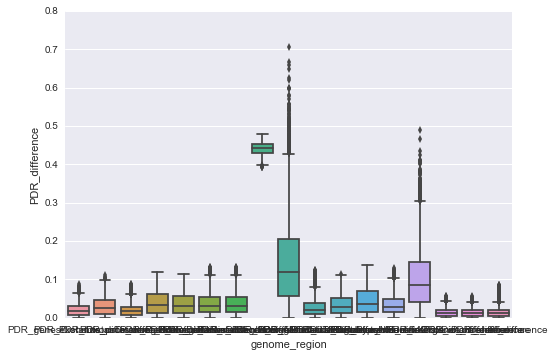

In [30]:
sns.boxplot(x=pdr_strip.genome_region, y=pdr_strip.PDR_difference)

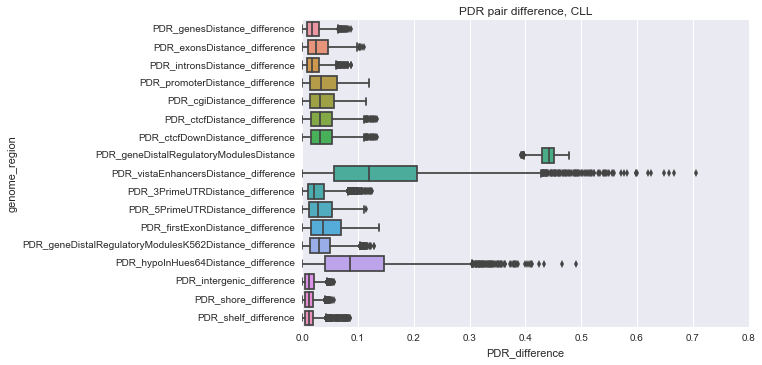

In [31]:
sns.boxplot(y=pdr_strip.genome_region, x=pdr_strip.PDR_difference)
plt.title("PDR pair difference, CLL")

(-0.01, 0.75)

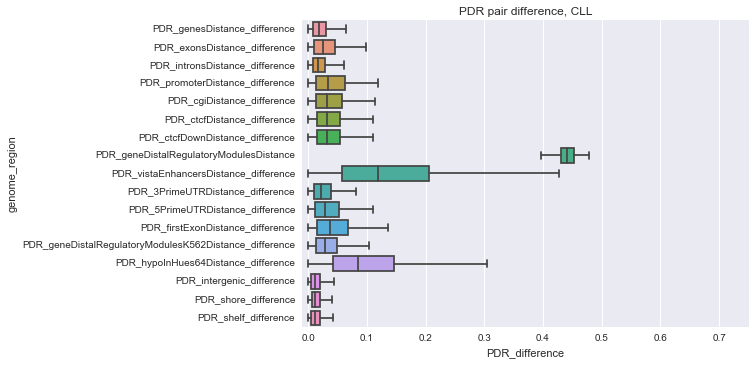

In [32]:
sns.boxplot(y=pdr_strip.genome_region, x=pdr_strip.PDR_difference, showfliers=False)
plt.title("PDR pair difference, CLL")
plt.xlim(-0.01, 0.75)

In [33]:
normalpdr_strip = pd.melt(pdr_normal, var_name='genome_region', value_name='PDR_difference')

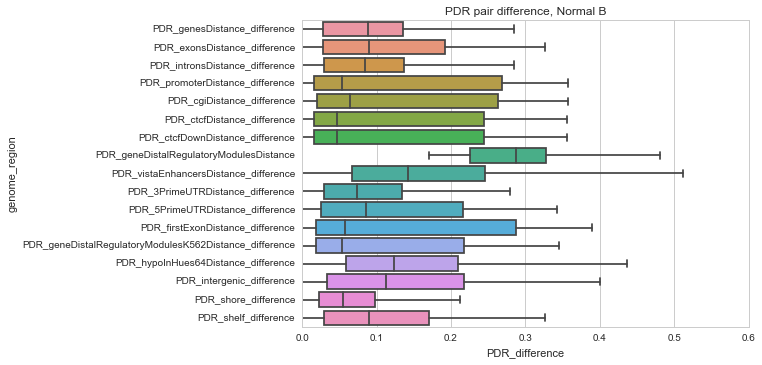

In [110]:
sns.boxplot(y=normalpdr_strip.genome_region, x=normalpdr_strip.PDR_difference, showfliers=False)
plt.title("PDR pair difference, Normal B")


In [35]:
pdr_strip["category"] = str("CLL")
normalpdr_strip["category"] = str("normal")

In [36]:
total_pdr_pairs = pd.concat([pdr_strip, normalpdr_strip])

In [37]:
total_pdr_pairs.head()

,genome_region,PDR_difference,category
0,PDR_genesDistance_difference,0.017944,CLL
1,PDR_genesDistance_difference,0.013822,CLL
2,PDR_genesDistance_difference,0.006976,CLL
3,PDR_genesDistance_difference,0.004491,CLL
4,PDR_genesDistance_difference,0.002186,CLL


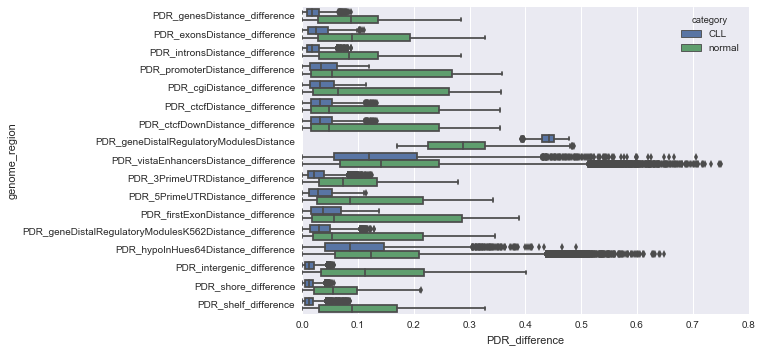

In [38]:
sns.boxplot(y=total_pdr_pairs.genome_region, x=total_pdr_pairs.PDR_difference, hue=total_pdr_pairs.category)

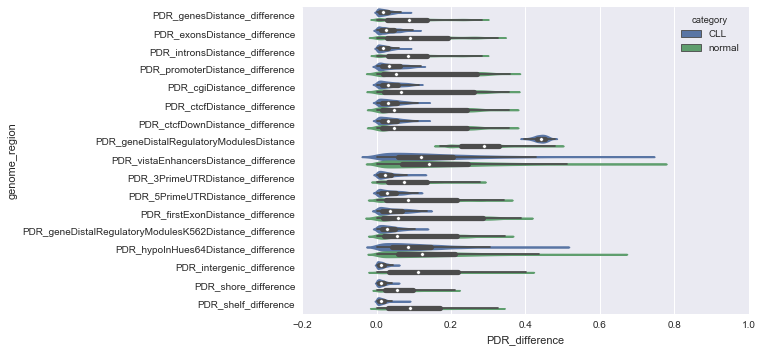

In [39]:
sns.violinplot(y=total_pdr_pairs.genome_region, x=total_pdr_pairs.PDR_difference, hue=total_pdr_pairs.category)

(-0.01, 0.7)

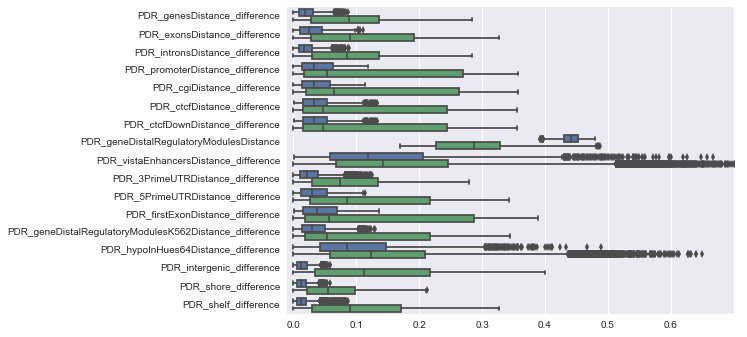

In [40]:
ax = sns.boxplot(y=total_pdr_pairs.genome_region, x=total_pdr_pairs.PDR_difference, hue=total_pdr_pairs.category)
sns.set_style("whitegrid")
ax.legend_.remove()
sns.despine(left=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xlim(-0.01, 0.7)

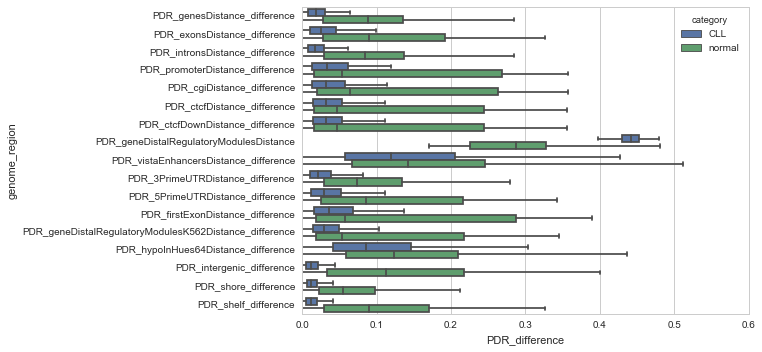

In [41]:
sns.boxplot(y=total_pdr_pairs.genome_region, x=total_pdr_pairs.PDR_difference, hue=total_pdr_pairs.category, showfliers=False)

In [42]:
meth_cll = cll_pairs[['methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference', 'methylation_shore_difference',
       'methylation_shelf_difference']]

In [43]:
meth_normal = normal_pairs[['methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference', 'methylation_shore_difference',
       'methylation_shelf_difference']]

In [44]:
meth_strip = pd.melt(meth_cll, var_name='genome_region', value_name='meth_difference')

In [45]:
normal_meth_strip = pd.melt(meth_normal, var_name='genome_region', value_name='meth_difference')

(-0.01, 0.75)

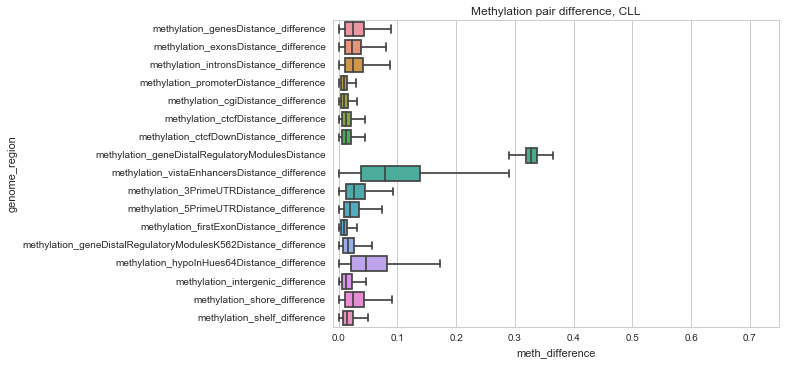

In [46]:
sns.boxplot(y=meth_strip.genome_region, x=meth_strip.meth_difference, showfliers=False)
plt.title("Methylation pair difference, CLL")
plt.xlim(-0.01, 0.75)

(-0.01, 0.4)

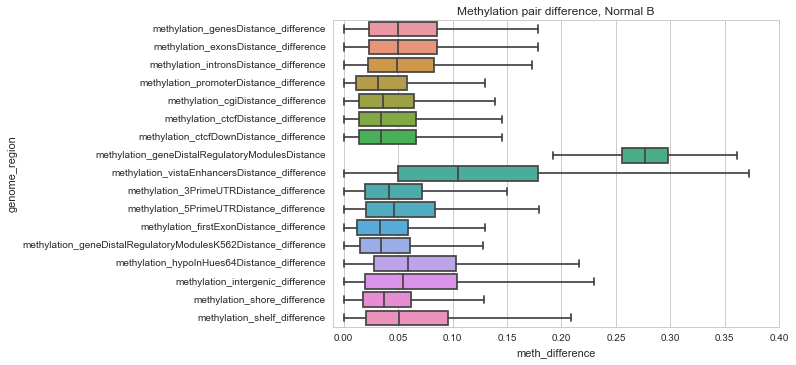

In [107]:
sns.boxplot(y=normal_meth_strip.genome_region, x=normal_meth_strip.meth_difference, showfliers=False)
plt.title("Methylation pair difference, Normal B")
plt.xlim(-0.01, 0.4)

In [48]:
meth_strip["category"] = str("CLL")
normal_meth_strip["category"] = str("normal")

In [49]:
total_meth_pairs = pd.concat([meth_strip, normal_meth_strip])

In [50]:
total_meth_pairs.head()

,genome_region,meth_difference,category
0,methylation_genesDistance_difference,0.061908,CLL
1,methylation_genesDistance_difference,0.037036,CLL
2,methylation_genesDistance_difference,0.012461,CLL
3,methylation_genesDistance_difference,0.003151,CLL
4,methylation_genesDistance_difference,0.030561,CLL


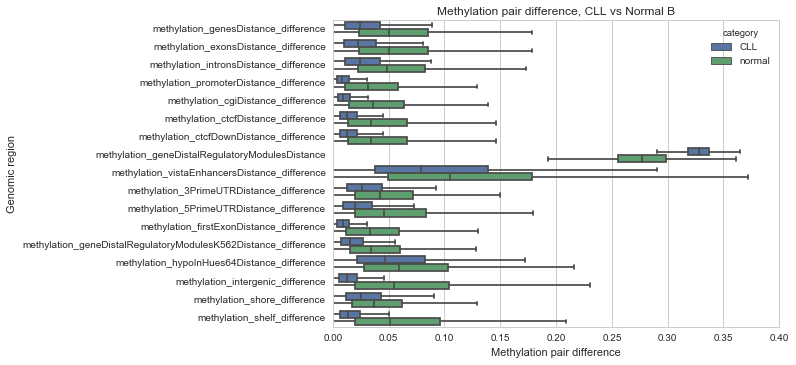

In [51]:
sns.boxplot(y=total_meth_pairs.genome_region, x=total_meth_pairs.meth_difference, hue=total_meth_pairs.category, showfliers=False)
plt.title("Methylation pair difference, CLL vs Normal B")
plt.ylabel("Genomic region")
plt.xlabel("Methylation pair difference")

In [52]:
#
# Batch effects
#

In [53]:
cll_pairs = pd.read_csv("total_CLL_pairs.csv")
normal_pairs = pd.read_csv("total_normal_pairs.csv")

In [54]:
cll_p1 = pd.read_csv("total_CLL_pairs_cw154_CutSmart_proteinase_K.csv")
cll_p2 = pd.read_csv("total_CLL_pairs_cw154_Tris_protease_GR.csv")
cll_p3 = pd.read_csv("total_CLL_pairs_cw154_Tris_protease.csv")
cll_p4 = pd.read_csv("total_CLL_pairs_trito_pool_2.csv")
cll_p5 = pd.read_csv("total_CLL_pairs_trito_pool_1.csv")

In [55]:
cll_p1.shape

(190, 43)

In [56]:
cll_p2.shape

(210, 43)

In [57]:
cll_p3.shape

(210, 43)

In [58]:
cll_p4.shape

(210, 43)

In [59]:
cll_p5.shape

(210, 43)

In [60]:
cll_p1.columns

Index(['filename', 'methylation_difference', 'PDR_difference',
       'methylation_unweighted_difference', 'PDR_unweighted_difference',
       'methylation_tssDistance_difference',
       'methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfUpDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference',

In [61]:
cll_p1_pairs_meth = cll_p1[['methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference', 'methylation_shore_difference',
       'methylation_shelf_difference']]

In [62]:
cll_p1_pairs_pdr = cll_p1[['PDR_genesDistance_difference', 'PDR_exonsDistance_difference',
       'PDR_intronsDistance_difference', 'PDR_promoterDistance_difference',
       'PDR_cgiDistance_difference', 'PDR_ctcfDistance_difference', 'PDR_ctcfDownDistance_difference',
       'PDR_geneDistalRegulatoryModulesDistance',
       'PDR_vistaEnhancersDistance_difference',
       'PDR_3PrimeUTRDistance_difference', 'PDR_5PrimeUTRDistance_difference',
       'PDR_firstExonDistance_difference',
       'PDR_geneDistalRegulatoryModulesK562Distance_difference',
       'PDR_hypoInHues64Distance_difference', 'PDR_intergenic_difference',
       'PDR_shore_difference', 'PDR_shelf_difference']]

In [63]:
cll_p1_pairs_meth.head()

,methylation_genesDistance_difference,methylation_exonsDistance_difference,methylation_intronsDistance_difference,methylation_promoterDistance_difference,methylation_cgiDistance_difference,methylation_ctcfDistance_difference,methylation_ctcfDownDistance_difference,methylation_geneDistalRegulatoryModulesDistance,methylation_vistaEnhancersDistance_difference,methylation_3PrimeUTRDistance_difference,methylation_5PrimeUTRDistance_difference,methylation_firstExonDistance_difference,methylation_geneDistalRegulatoryModulesK562Distance_difference,methylation_hypoInHues64Distance_difference,methylation_intergenic_difference,methylation_shore_difference,methylation_shelf_difference
0,0.061908,0.063171,0.061692,0.008419,0.015893,0.021971,0.021971,0.313298,0.168000,0.072074,0.039032,0.005708,0.009695,0.115001,0.023945,0.060024,0.026049
1,0.037036,0.030429,0.039083,0.010795,0.011695,0.004564,0.004564,0.322613,0.071913,0.003508,0.025250,0.004269,0.020952,0.044339,0.027542,0.038797,0.021242
2,0.012461,0.010976,0.011688,0.009044,0.005338,0.000635,0.000635,0.335660,0.073183,0.005837,0.009638,0.012017,0.001243,0.061656,0.010744,0.018724,0.005473
3,0.003151,0.002555,0.007479,0.000038,0.000232,0.002878,0.002878,0.334811,0.040023,0.007573,0.009650,0.002276,0.003349,0.089233,0.004504,0.001901,0.000775
4,0.030561,0.021995,0.031347,0.012158,0.017333,0.010564,0.010564,0.315714,0.119406,0.015520,0.029014,0.004847,0.030446,0.052160,0.008754,0.013406,0.024762


In [64]:
cll_p1_pairs_pdr.head()

,PDR_genesDistance_difference,PDR_exonsDistance_difference,PDR_intronsDistance_difference,PDR_promoterDistance_difference,PDR_cgiDistance_difference,PDR_ctcfDistance_difference,PDR_ctcfDownDistance_difference,PDR_geneDistalRegulatoryModulesDistance,PDR_vistaEnhancersDistance_difference,PDR_3PrimeUTRDistance_difference,PDR_5PrimeUTRDistance_difference,PDR_firstExonDistance_difference,PDR_geneDistalRegulatoryModulesK562Distance_difference,PDR_hypoInHues64Distance_difference,PDR_intergenic_difference,PDR_shore_difference,PDR_shelf_difference
0,0.017944,0.014914,0.023745,0.010619,0.007573,0.005478,0.005478,0.443367,0.447138,0.033053,0.010550,0.007207,0.006339,0.050882,0.038740,0.025786,0.017234
1,0.013822,0.009663,0.015477,0.002511,0.004552,0.016568,0.016568,0.448398,0.068598,0.033664,0.011063,0.001208,0.025634,0.117134,0.031556,0.010400,0.018353
2,0.006976,0.004017,0.005133,0.013137,0.004066,0.001556,0.001556,0.449179,0.083869,0.032390,0.006514,0.011039,0.011944,0.225987,0.010122,0.006835,0.000683
3,0.004491,0.006306,0.002300,0.000998,0.002985,0.003113,0.003113,0.437409,0.013400,0.011693,0.000163,0.013259,0.004513,0.122621,0.002354,0.000248,0.001510
4,0.002186,0.008113,0.000072,0.004676,0.011485,0.013408,0.013408,0.437915,0.101218,0.028780,0.000437,0.010612,0.017699,0.074842,0.009969,0.002323,0.005733


In [65]:
meth_strip1 = pd.melt(cll_p1_pairs_meth, var_name='genome_region', value_name='meth_difference')

In [66]:
cll_strip1 = pd.melt(cll_p1_pairs_pdr, var_name='genome_region', value_name='meth_difference')

(-0.01, 0.75)

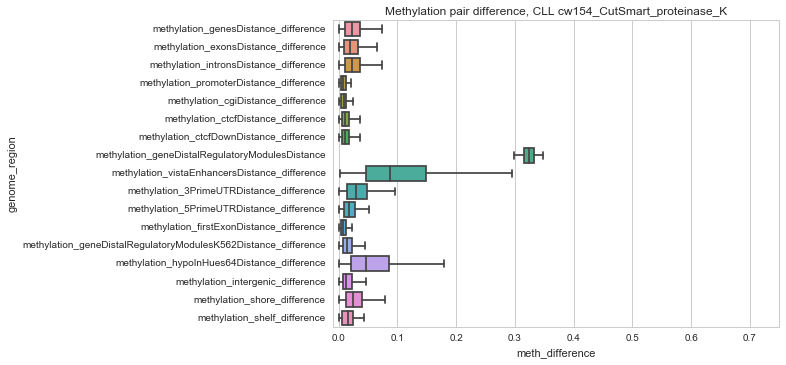

In [67]:
sns.boxplot(y=meth_strip1.genome_region, x=meth_strip1.meth_difference, showfliers=False)
plt.title("Methylation pair difference, CLL cw154_CutSmart_proteinase_K")
plt.xlim(-0.01, 0.75)

(-0.01, 0.75)

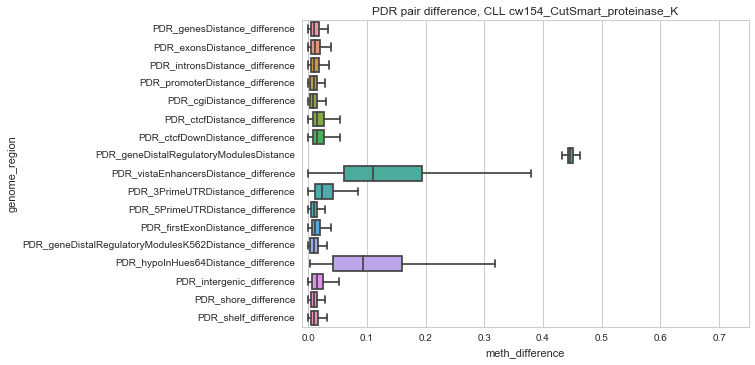

In [68]:
sns.boxplot(y=cll_strip1.genome_region, x=cll_strip1.meth_difference, showfliers=False)
plt.title("PDR pair difference, CLL cw154_CutSmart_proteinase_K")
plt.xlim(-0.01, 0.75)

In [76]:
cll_p5_pairs_meth = cll_p5[['methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference', 'methylation_shore_difference',
       'methylation_shelf_difference']]

In [77]:
cll_p5_pairs_pdr = cll_p5[['PDR_genesDistance_difference', 'PDR_exonsDistance_difference',
       'PDR_intronsDistance_difference', 'PDR_promoterDistance_difference',
       'PDR_cgiDistance_difference', 'PDR_ctcfDistance_difference', 'PDR_ctcfDownDistance_difference',
       'PDR_geneDistalRegulatoryModulesDistance',
       'PDR_vistaEnhancersDistance_difference',
       'PDR_3PrimeUTRDistance_difference', 'PDR_5PrimeUTRDistance_difference',
       'PDR_firstExonDistance_difference',
       'PDR_geneDistalRegulatoryModulesK562Distance_difference',
       'PDR_hypoInHues64Distance_difference', 'PDR_intergenic_difference',
       'PDR_shore_difference', 'PDR_shelf_difference']]

In [78]:
meth_strip5 = pd.melt(cll_p5_pairs_meth, var_name='genome_region', value_name='meth_difference')

In [79]:
cll_strip5 = pd.melt(cll_p5_pairs_pdr, var_name='genome_region', value_name='meth_difference')

(-0.01, 0.75)

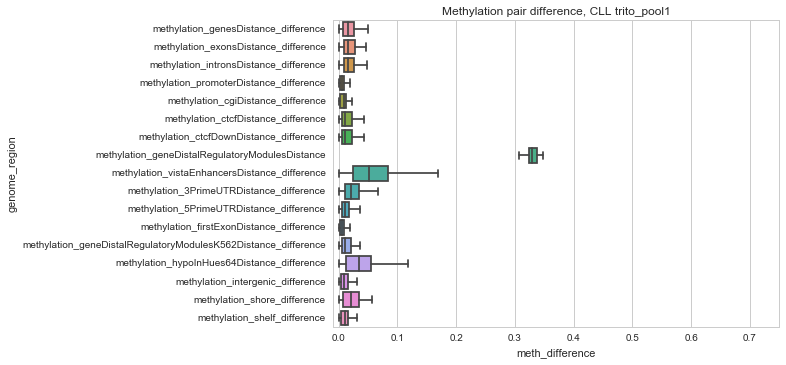

In [80]:
sns.boxplot(y=meth_strip5.genome_region, x=meth_strip5.meth_difference, showfliers=False)
plt.title("Methylation pair difference, CLL trito_pool1")
plt.xlim(-0.01, 0.75)

(-0.01, 0.75)

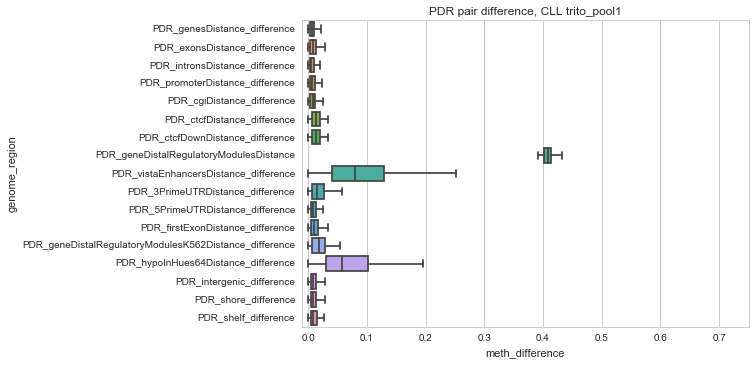

In [81]:
sns.boxplot(y=cll_strip5.genome_region, x=cll_strip5.meth_difference, showfliers=False)
plt.title("PDR pair difference, CLL trito_pool1")
plt.xlim(-0.01, 0.75)

In [82]:
normal_p1 = pd.read_csv("total_normal_pairs_Normal_B_cell_A1_24.csv")

In [83]:
normalA_meth = normal_p1[['methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference', 'methylation_shore_difference',
       'methylation_shelf_difference']]

In [84]:
normalA_pdr = normal_p1[['PDR_genesDistance_difference', 'PDR_exonsDistance_difference',
       'PDR_intronsDistance_difference', 'PDR_promoterDistance_difference',
       'PDR_cgiDistance_difference', 'PDR_ctcfDistance_difference', 'PDR_ctcfDownDistance_difference',
       'PDR_geneDistalRegulatoryModulesDistance',
       'PDR_vistaEnhancersDistance_difference',
       'PDR_3PrimeUTRDistance_difference', 'PDR_5PrimeUTRDistance_difference',
       'PDR_firstExonDistance_difference',
       'PDR_geneDistalRegulatoryModulesK562Distance_difference',
       'PDR_hypoInHues64Distance_difference', 'PDR_intergenic_difference',
       'PDR_shore_difference', 'PDR_shelf_difference']]

In [87]:
meth_normalA = pd.melt(normalA_meth, var_name='genome_region', value_name='meth_difference')

In [89]:
pdr_normalA = pd.melt(normalA_pdr, var_name='genome_region', value_name='meth_difference')

(-0.01, 0.75)

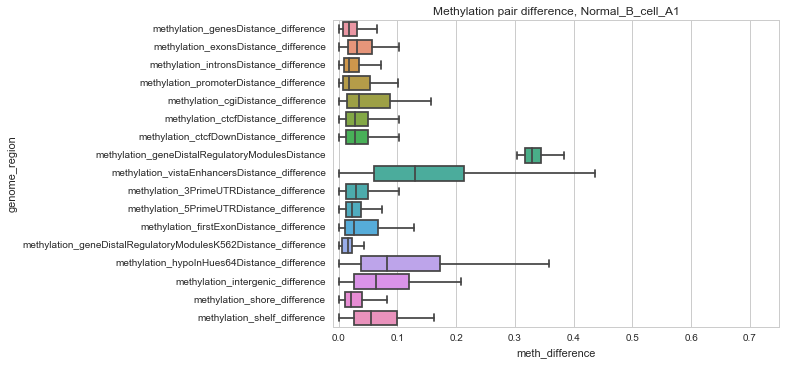

In [92]:
sns.boxplot(y=meth_normalA.genome_region, x=meth_normalA.meth_difference, showfliers=False)
plt.title("Methylation pair difference, Normal_B_cell_A1")
plt.xlim(-0.01, 0.75)

(-0.01, 0.75)

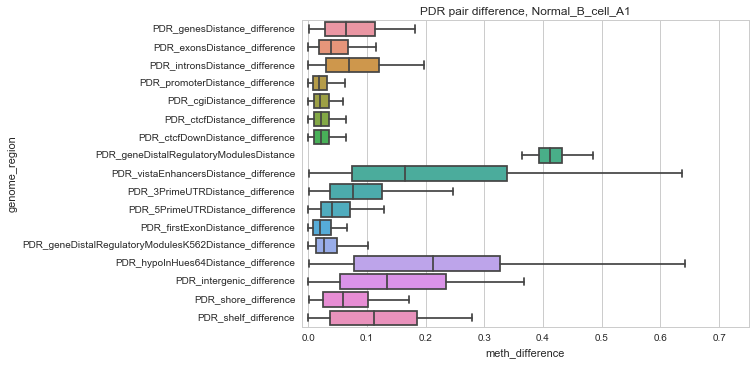

In [93]:
sns.boxplot(y=pdr_normalA.genome_region, x=pdr_normalA.meth_difference, showfliers=False)
plt.title("PDR pair difference, Normal_B_cell_A1")
plt.xlim(-0.01, 0.75)

In [98]:
mcell = pd.read_csv("total_normal_pairs_NormalBCD19pCD27mcell1_22.csv")

In [99]:
mcell22_meth = normal_p1[['methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference', 'methylation_shore_difference',
       'methylation_shelf_difference']]

In [100]:
mcell22_pdr = normal_p1[['PDR_genesDistance_difference', 'PDR_exonsDistance_difference',
       'PDR_intronsDistance_difference', 'PDR_promoterDistance_difference',
       'PDR_cgiDistance_difference', 'PDR_ctcfDistance_difference', 'PDR_ctcfDownDistance_difference',
       'PDR_geneDistalRegulatoryModulesDistance',
       'PDR_vistaEnhancersDistance_difference',
       'PDR_3PrimeUTRDistance_difference', 'PDR_5PrimeUTRDistance_difference',
       'PDR_firstExonDistance_difference',
       'PDR_geneDistalRegulatoryModulesK562Distance_difference',
       'PDR_hypoInHues64Distance_difference', 'PDR_intergenic_difference',
       'PDR_shore_difference', 'PDR_shelf_difference']]

In [101]:
meth_mcell22 = pd.melt(mcell22_meth, var_name='genome_region', value_name='meth_difference')

In [102]:
pdr_mcell22 = pd.melt(mcell22_pdr, var_name='genome_region', value_name='meth_difference')

(-0.01, 0.75)

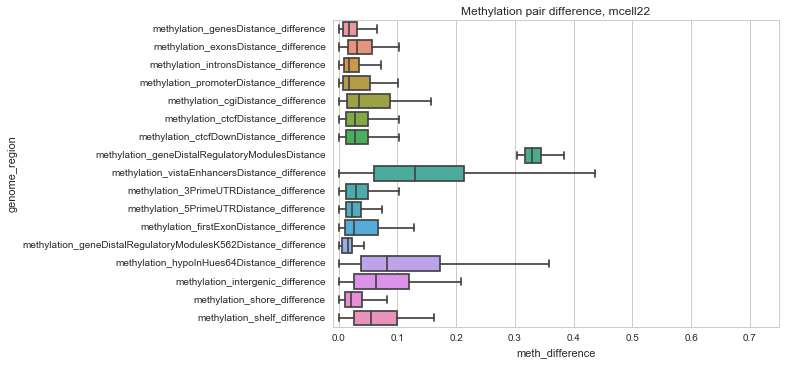

In [105]:
sns.boxplot(y=meth_mcell22.genome_region, x=meth_mcell22.meth_difference, showfliers=False)
plt.title("Methylation pair difference, mcell22")
plt.xlim(-0.01, 0.75)

(-0.01, 0.75)

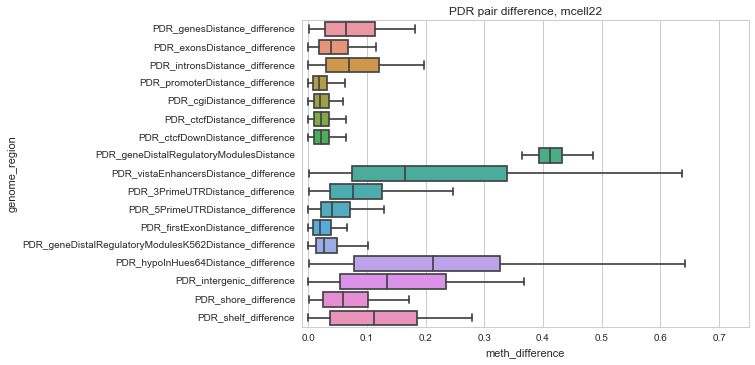

In [106]:
sns.boxplot(y=pdr_mcell22.genome_region, x=pdr_mcell22.meth_difference, showfliers=False)
plt.title("PDR pair difference, mcell22")
plt.xlim(-0.01, 0.75)